In [16]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Classroom/amazon_products_dataset.csv'
df=pd.read_csv(path)
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
5,Gaming Laptop,Mi,Smartwatch,17009.0,12349.0,1.7,14179.0
6,Smartphone with AMOLED Display,OnePlus,Laptop,10026.0,5451.0,3.4,18262.0
7,Smart Fitness Watch,Sony,Laptop,61124.0,56399.0,2.7,9675.0
8,High Resolution Monitor,Boat,Monitor,40842.0,39232.0,2.8,309.0
9,4K Action Camera,Dell,Speaker,20545.0,16733.0,2.0,3952.0


In [17]:
df.head(10)

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
5,Gaming Laptop,Mi,Smartwatch,17009.0,12349.0,1.7,14179.0
6,Smartphone with AMOLED Display,OnePlus,Laptop,10026.0,5451.0,3.4,18262.0
7,Smart Fitness Watch,Sony,Laptop,61124.0,56399.0,2.7,9675.0
8,High Resolution Monitor,Boat,Monitor,40842.0,39232.0,2.8,309.0
9,4K Action Camera,Dell,Speaker,20545.0,16733.0,2.0,3952.0


In [18]:
df.isnull().sum()


,0
title,0
brand,0
category,2
actual_price,2
discount_price,1
rating,4
rating_count,4


In [19]:
df.shape

(2000, 7)

In [21]:
# 2️⃣ Check initial missing values
print("Missing values per column (before cleaning):\n", df.isnull().sum())

# 3️⃣ Define numeric and categorical columns
numeric_cols = ['actual_price', 'discount_price', 'rating', 'rating_count']
categorical_cols = ['title', 'brand', 'category']

# 4️⃣ Fill numeric missing values with the mean
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean()) # Removed inplace=True

# 5️⃣ Fill categorical missing values with "Unknown"
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown") # Removed inplace=True

# 6️⃣ Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True) # Removed inplace=True and combined with reset_index

# 7️⃣ Ensure numeric columns are correct type (coercing errors)
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 8️⃣ Final check for any remaining NaNs after numeric coercion (should be none if fillna was effective)
#    and fill any new NaNs introduced by pd.to_numeric(errors='coerce')
for col in numeric_cols:
    if col in df.columns and df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# ✅ Check cleaned data
print("\nMissing values per column (after cleaning):\n", df.isnull().sum())
print("\nInfo after cleaning:")
df.info()
print("\nHead after cleaning:")
print(df.head())

Missing values per column (before cleaning):
 title             0
brand             0
category          0
actual_price      0
discount_price    0
rating            0
rating_count      0
dtype: int64

Missing values per column (after cleaning):
 title             0
brand             0
category          0
actual_price      0
discount_price    0
rating            0
rating_count      0
dtype: int64

Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        2000 non-null   object 
 3   actual_price    2000 non-null   float64
 4   discount_price  2000 non-null   float64
 5   rating          2000 non-null   float64
 6   rating_count    2000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB

Head after cle

In [23]:
# Calculate discount percentage
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

avg_discount_brand = df.groupby('brand')['discount_percent'].mean()
print(avg_discount_brand)

brand
Apple      12.721996
Boat       12.546502
Dell       11.165004
HP         11.501202
JBL        11.370137
LG         11.968799
Mi         10.162308
OnePlus    11.380987
Samsung     9.302573
Sony       10.388873
Name: discount_percent, dtype: float64


In [24]:
avg_popularity_price = df.groupby('price_category')['popularity_score'].mean()
print(avg_popularity_price)


KeyError: 'price_category'

In [25]:
# Define price bins and labels for price categories
bins = [0, 10000, 30000, 60000, df['actual_price'].max() + 1]
labels = ['Low', 'Medium', 'High', 'Premium']

# Create the 'price_category' column
df['price_category'] = pd.cut(df['actual_price'], bins=bins, labels=labels, right=False)

# Display the count of products in each price category
print("Price Category Distribution:\n", df['price_category'].value_counts())

# Display the first few rows with the new column
display(df.head())

Price Category Distribution:
 price_category
High       731
Medium     519
Premium    496
Low        254
Name: count, dtype: int64


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,Premium
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,Premium
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,High
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,Premium
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,High


In [26]:
# Create a 'popularity_score' column (using rating_count as a proxy for now)
df['popularity_score'] = df['rating_count'] * df['rating'] # A simple way to combine rating and count

# Display the first few rows with the new column
display(df.head())

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,Premium,5532.8
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,Premium,22795.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,High,4782.3
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,Premium,64872.1
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,High,69717.2


TypeError: '>' not supported between instances of 'str' and 'int'

In [27]:
avg_popularity_price = df.groupby('price_category')['popularity_score'].mean()
print(avg_popularity_price)

price_category
Low        29693.604905
Medium     29793.874181
High       29895.797877
Premium    28745.700353
Name: popularity_score, dtype: float64


/tmp/ipython-input-1165256592.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity_price = df.groupby('price_category')['popularity_score'].mean()


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [34]:


df['age'].fillna(df['age'].mean(), inplace=True)


/tmp/ipython-input-2416535964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [39]:
import pandas as pd

df['age'] = df['age'].fillna(df['age'].mean())

In [40]:
df.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [49]:
df['deck'] = df['deck'].fillna('unknown')

In [50]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [51]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,unknown,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,unknown,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,unknown,Queenstown,no,True
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,unknown,Southampton,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,unknown,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,unknown,Cherbourg,yes,False


In [54]:
df.duplicated().sum()

np.int64(107)

In [53]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,unknown,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,unknown,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.000000,0,0,7.8958,S,Third,man,True,unknown,Southampton,no,True
877,0,3,male,19.000000,0,0,7.8958,S,Third,man,True,unknown,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,unknown,Southampton,no,True
884,0,3,male,25.000000,0,0,7.0500,S,Third,man,True,unknown,Southampton,no,True


In [55]:
df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,unknown,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,unknown,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,unknown,Queenstown,no,False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,unknown,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [56]:
df.duplicated().sum()

np.int64(107)

In [57]:
df=df.drop_duplicates(keep='first')

In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,unknown,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,unknown,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

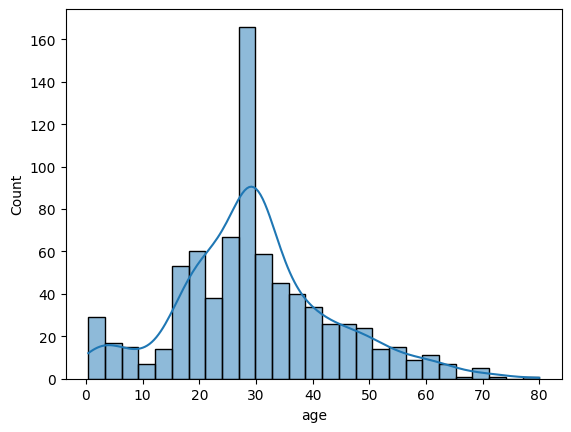

In [61]:
sns.histplot(df['age'],kde=True)

<Axes: ylabel='fare'>

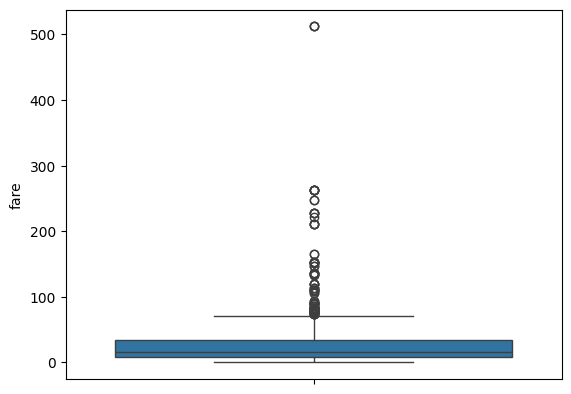

In [65]:
sns.boxplot(df['fare'])

<Axes: xlabel='class', ylabel='fare'>

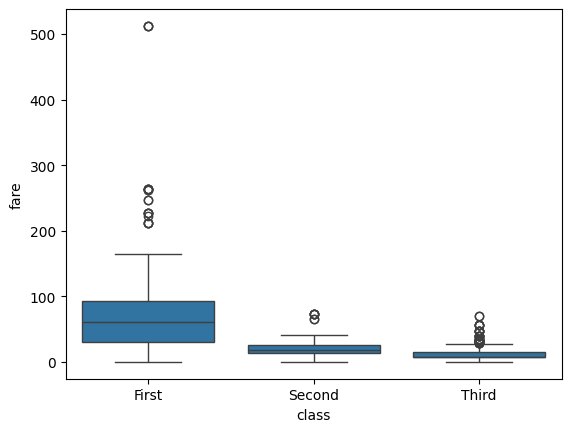

In [66]:
sns.boxplot(x='class',y='fare',data=df)

<Axes: xlabel='sex', ylabel='age'>

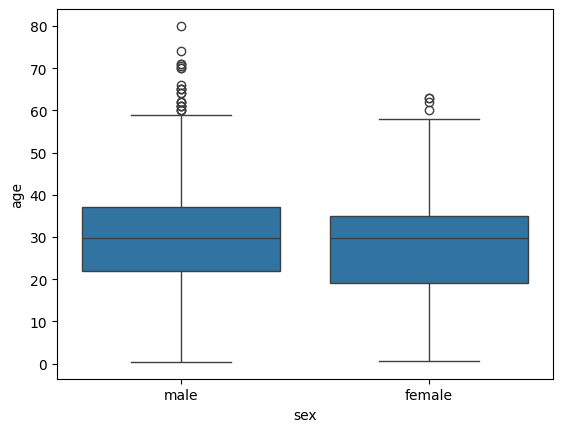

In [67]:
sns.boxplot(x='sex',y='age',data=df)

<Axes: xlabel='survived'>

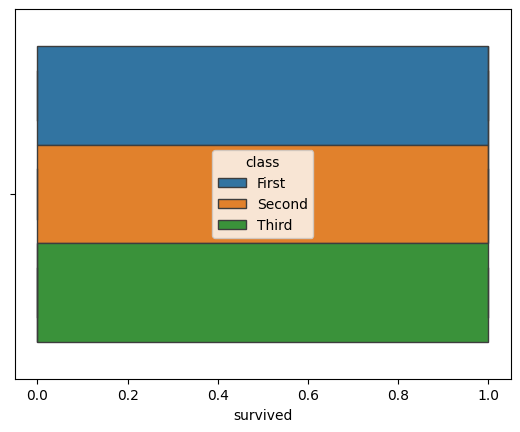

In [68]:
sns.boxplot(x='survived',hue='class',data=df)

<Axes: xlabel='survived'>

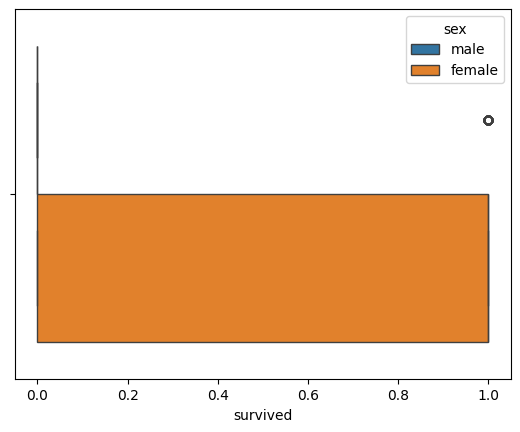

In [69]:
sns.boxplot(x='survived',hue='sex',data=df)

<Axes: >

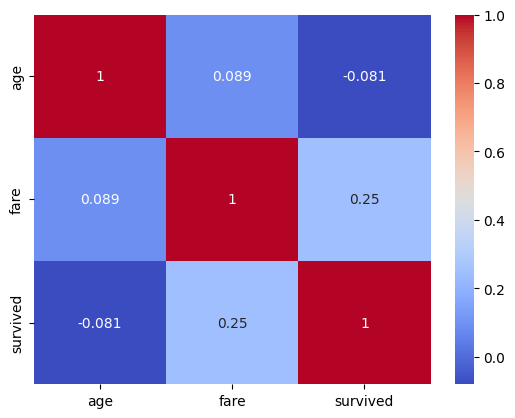

In [70]:
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

<Axes: xlabel='fare_cap'>

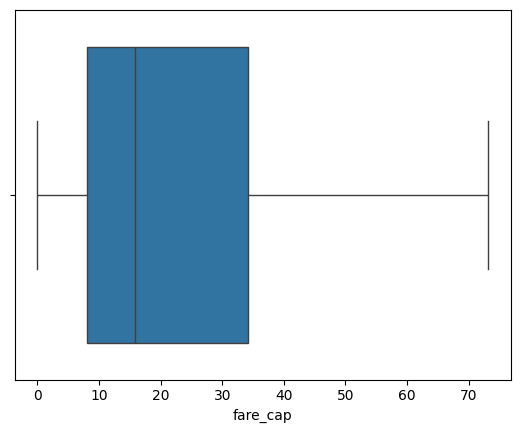

In [72]:
q1=df['fare'].quantile(0.25)
q3=df['fare'].quantile(0.75)
iqr=q3-q1

lower=q1-1.5*iqr
upper=q3+1.5*iqr

outliers=df[ (df['fare']<lower)  | (df['fare']>upper) ]
# The original line 'df['fare_cap']=df['fare'].clip(lower.upper)' had an error, assuming it should be 'upper' not 'lower.upper'
df['fare_cap']=df['fare'].clip(lower=lower, upper=upper)
sns.boxplot(x=df['fare_cap'])